# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

### Student Name: Mateusz Checinski

Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin master`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [1]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [3]:
#fn1 = "/u/checinsm/code_github/datasets/genes_id.txt"
genes_ID = pd.read_csv("/u/checinsm/code_github/datasets/genes_id.txt", header=None)


#fn2 = "/u/checinsm/code_github/datasets/patient_subtype.txt"
patient_subtypes = pd.read_csv("/u/checinsm/code_github/datasets/patient_subtype.txt", header=None)


#fn3 = "/u/checinsm/code_github/datasets/patient_expression.txt"
gene_expression = pd.read_csv("/u/checinsm/code_github/datasets/patient_expression.txt", sep=" ", header=None)


### How many patient are you considering? [1 pt]

In [4]:
gene_expression.shape
print(645, "patients")

645 patients


### How many genes are you considering? [1 pt]

In [5]:
genes_ID.shape
print(47, "genes") #final colimn is clinical subtypes

47 genes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [6]:
data = gene_expression
data.columns = genes_ID[0]
data.loc[:, "Clinical_subtypes"] = patient_subtypes.iloc[:, 0]
data.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical_subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [7]:
print((data.loc[:, "Clinical_subtypes"].nunique()), "subtypes")

5 subtypes


### How many patients are associtated to each subtype? [2 pts]

In [8]:
print("Clinical subtypes:", (data.loc[:,"Clinical_subtypes"].unique()))

Clinical subtypes: ['Basal' 'LumA' 'LumB' 'Her2' 'Normal']


In [9]:
#or print("Basal: ", data.loc[data.Clinical_subtypes == "Basal", :].count()[1])
print("  #Patients asscoaited to each subtype:")
print("Basal: ", patient_subtypes.loc[data.Clinical_subtypes == "Basal", :].count()[0])
print("LumA: ", patient_subtypes.loc[data.Clinical_subtypes == "LumA", :].count()[0])
print("LumB: ", patient_subtypes.loc[data.Clinical_subtypes == "LumB", :].count()[0])
print("Her2: ", patient_subtypes.loc[data.Clinical_subtypes == "Basal", :].count()[0])
print("Normal: ", patient_subtypes.loc[data.Clinical_subtypes == "Normal", :].count()[0])

  #Patients asscoaited to each subtype:
Basal:  191
LumA:  179
LumB:  165
Her2:  191
Normal:  28


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

In [10]:
data_no_subtypes = data.iloc[:,1:47]
data_no_subtypes.mean()

0
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
ENSG00000089685.13    2.554557
ENSG00000091831.20    2.491631
ENSG00000092621.10    2.452480
ENSG00000094804.8     1.803410
ENSG00000099953.8     3.506780
ENSG00000101057.14    2.927418
ENSG00000104332.10    2.226754
ENSG00000105173.12    1.360070
ENSG00000106605.9     3.432338
ENSG00000107262.15    2.479991
ENSG00000115648.12    2.966889
ENSG00000117399.12    2.978518
ENSG00000117724.11    2.402607
ENSG00000128422.14    2.524521
ENSG00000129514.5     3.439974
ENSG00000133627.16    1.146421
ENSG00000134057.13    3.088703
ENSG00000135679.20    2.056612
ENSG00000136997.13    3.338576
ENSG00000138180.14    2.161510
ENSG00000141424.11    4.854191
ENSG00000141736.12    3.646903
ENSG00000141738.12    2.391021
ENSG00000142945.11    2.190188
ENSG00000146648.14    1.253302
ENSG00000148773.11    2.236166
ENSG00000151715.6     1.273940
ENSG00000160867.13    1.139127
ENSG00

/scratch/checinsm.113009.0/ipykernel_3749050/3971991792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(data_no_subtypes, bins=25)


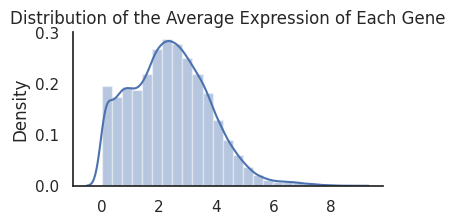

In [11]:
p = sns.distplot(data_no_subtypes, bins=25)
p.set_title("Distribution of the Average Expression of Each Gene")
sns.despine()

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [12]:
#data_no_subtypes is the "data" table but without final column, doesnt work since it is not an integer
std = data_no_subtypes.std()
std.sort_values(ascending=False).head(2)

0
ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64

### Compare the expression of these two genes: are they correlated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

In [13]:
#if pearson correaltion, do not say they are linearly correlated
#high spearman does not mean linear correlation but investigates the monocity, pearson is for linear correaltion

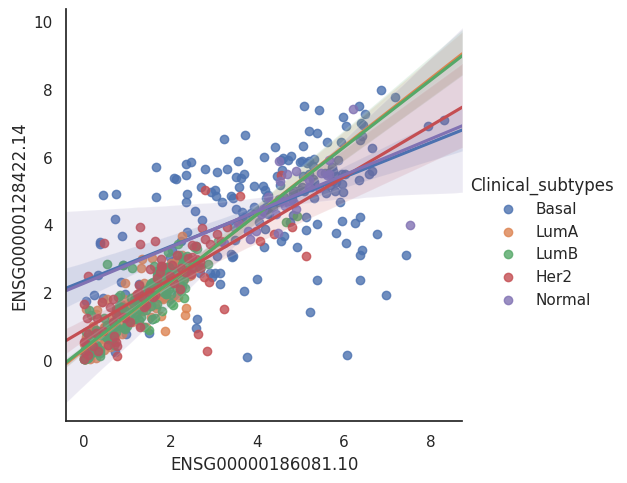

In [14]:
sns.lmplot(data, x="ENSG00000186081.10", y="ENSG00000128422.14", hue="Clinical_subtypes", truncate=False)
sns.despine()

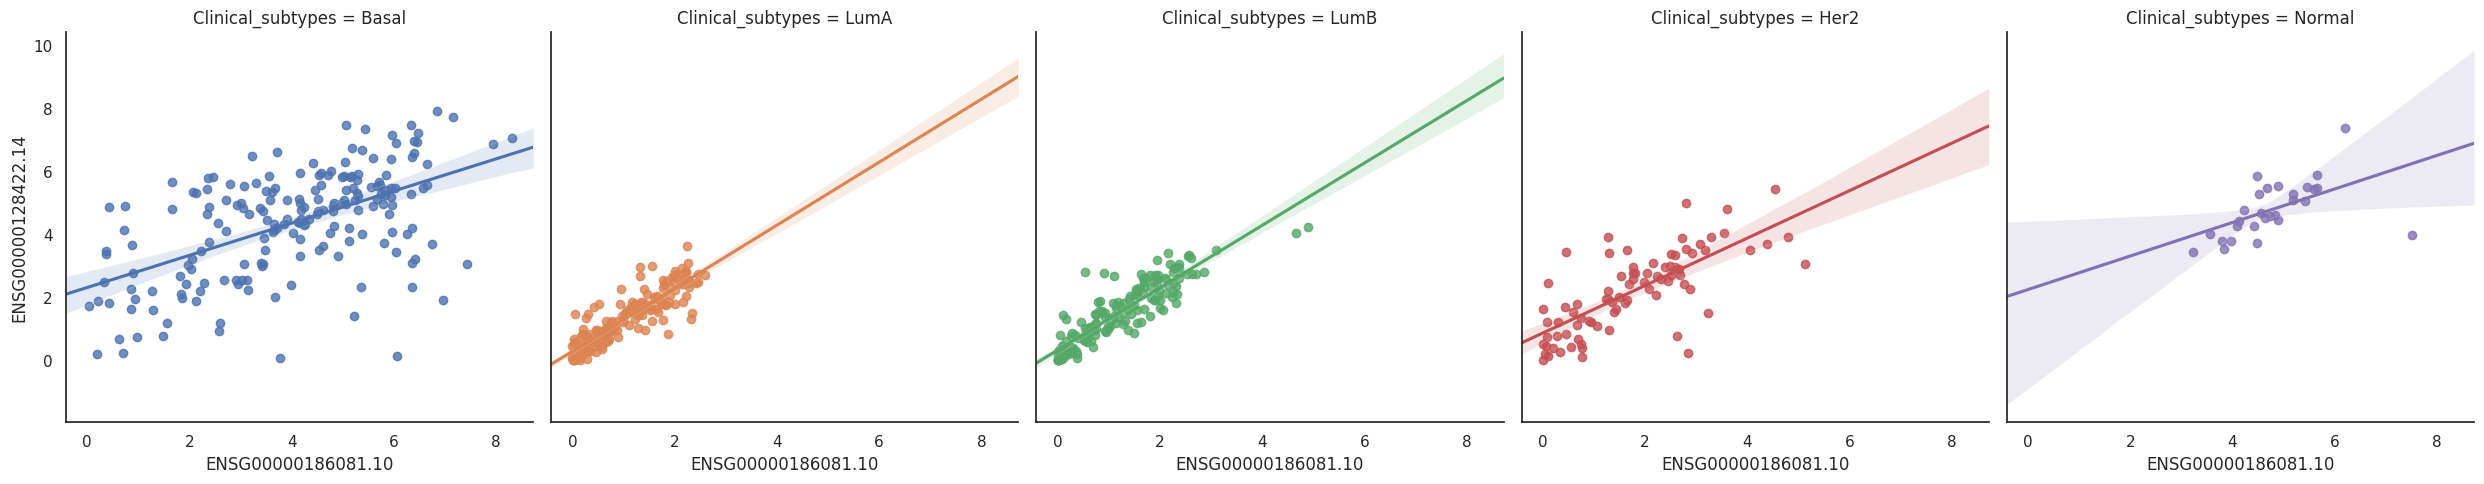

In [15]:
reg = sp.stats.linregress(x=data["ENSG00000186081.10"] , y=data["ENSG00000128422.14"], alternative="two-sided")
p = sns.lmplot(data=data, x="ENSG00000186081.10", y="ENSG00000128422.14", hue="Clinical_subtypes", truncate=False, col="Clinical_subtypes")

In [16]:
print("Pearson Correlations: ")
Global = data.loc[data.Clinical_subtypes == "Basal", :]
reg_Global = sp.stats.linregress(data["ENSG00000186081.10"] , y=data["ENSG00000128422.14"], alternative="two-sided")
print("Global: ", reg_Global.rvalue)

Basal = data.loc[data.Clinical_subtypes == "Basal", :]
reg_Basal = sp.stats.linregress(Basal["ENSG00000186081.10"] , y=Basal["ENSG00000128422.14"], alternative="two-sided")
print("Basal: ", reg_Basal.rvalue)

LumA = data.loc[data.Clinical_subtypes == "LumA", :]
reg_LumA = sp.stats.linregress(LumA["ENSG00000186081.10"] , y=LumA["ENSG00000128422.14"], alternative="two-sided")
print("LumA: ", reg_LumA.rvalue)

LumB = data.loc[data.Clinical_subtypes == "LumB", :]
reg_LumB = sp.stats.linregress(LumB["ENSG00000186081.10"] , y=LumB["ENSG00000128422.14"], alternative="two-sided")
print("LumB: ", reg_LumB.rvalue)

Her2 = data.loc[data.Clinical_subtypes == "Her2", :]
reg_Her2 = sp.stats.linregress(Her2["ENSG00000186081.10"] , y=Her2["ENSG00000128422.14"], alternative="two-sided")
print("Her2: ", reg_Her2.rvalue)

Normal = data.loc[data.Clinical_subtypes == "Normal", :]
reg_Normal = sp.stats.linregress(Normal["ENSG00000186081.10"] , y=Normal["ENSG00000128422.14"], alternative="two-sided")
print("Normal: ", reg_Normal.rvalue)
print(" ")
print("The global Pearson correlation coefficient, although not very informative since we are observing the correlation")
print("based on 5 different conditions, suggests there might be some correlation. When we break down the datset by the")
print("individaul subtypes, we obtain more information. Indeed, 3 subtypes show strong correlation between the") 
print("ENSG00000186081.10 and ENSG00000128422.14 genes. These are LumA, LumB and Her2 clinical subtypes.") 
print("The other 2 (Basal and Normal) show significantly less linear correlation between the 2 genes.") 
print("In fact 0.5 means they are halfway between no and full linear correlation.")
print(" ")
print("Lastly, while the Pearson coefficient determines if the correlation is linear,")
print("the Spearman rank correlation gievs information about the monotonicity of the data.")

Pearson Correlations: 
Global:  0.8521665313702186
Basal:  0.5544196989003722
LumA:  0.8914287604819622
LumB:  0.8974230320693612
Her2:  0.7362528192401565
Normal:  0.5350817650187477
 
The global Pearson correlation coefficient, although not very informative since we are observing the correlation
based on 5 different conditions, suggests there might be some correlation. When we break down the datset by the
individaul subtypes, we obtain more information. Indeed, 3 subtypes show strong correlation between the
ENSG00000186081.10 and ENSG00000128422.14 genes. These are LumA, LumB and Her2 clinical subtypes.
The other 2 (Basal and Normal) show significantly less linear correlation between the 2 genes.
In fact 0.5 means they are halfway between no and full linear correlation.
 
Lastly, while the Pearson coefficient determines if the correlation is linear,
the Spearman rank correlation gievs information about the monotonicity of the data.


## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering algorithm to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

In [17]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(data_no_subtypes)
subset_scaled = scaler.transform(data_no_subtypes) 
pca = sklearn.decomposition.PCA(n_components=25)
pca.fit(subset_scaled)

PCA(n_components=25)

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

In [18]:
#variance and ratio, for % use 
pca.explained_variance_
#sns.barplot(x = ["PC1", "PC2","PC3","PC4", "PC5","PC6","PC7","PC8","PC9","PC10","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4","PC4",],y=pca.explained_variance_ratio_)
#sns.despine()
print((pca.explained_variance_ratio_[0:2].sum()*100), "%")

57.33946119614175 %


### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

In [19]:
pca_reduce = pca.fit_transform(subset_scaled)

### Make a dataframe and add the label column
data_reduce = pd.DataFrame(pca_reduce)
data_reduce.loc[:, "Clinical_subtypes"] = data.Clinical_subtypes 

data_reduce.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical_subtypes
0,5.737783,-2.114879,0.957042,3.111174,-0.007781,0.452228,-1.311013,1.900442,-1.276902,-0.779902,...,-1.546205,0.229424,-0.631348,-0.571140,0.983780,0.026614,0.991039,0.421865,-1.206125,Basal
1,5.586829,-2.510840,-0.939535,0.370624,1.981533,-0.214957,-0.126106,-0.873382,-0.196873,0.130535,...,0.319784,-0.197436,0.298935,-0.043598,-0.016837,-0.199250,-0.493350,-0.413982,0.073247,Basal
2,8.296841,-0.329168,-2.064708,-1.212346,1.594945,-0.822196,0.154304,0.278601,-0.061110,0.858779,...,-0.191447,0.132325,-0.082586,0.040340,-0.328934,0.326424,-0.244879,-0.022670,-0.238045,Basal
3,7.442864,0.080622,-0.774431,1.823684,1.120201,-0.962194,-0.925668,0.808279,-0.167956,-0.139941,...,-0.396927,-0.338059,0.006650,-0.213155,0.244911,-0.374905,-0.434506,-0.014839,-0.036035,Basal
4,3.744414,-2.141032,-2.330520,-6.463385,-1.588350,-0.724702,-1.598153,1.948666,-0.319360,-0.699529,...,-0.894915,0.248127,-2.290100,1.215417,0.586313,0.876758,0.094520,-0.350452,-0.465641,Basal


### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

Yes, I do think so because the points appear to already form individual clusters,
the points are not scattered arround randomly.


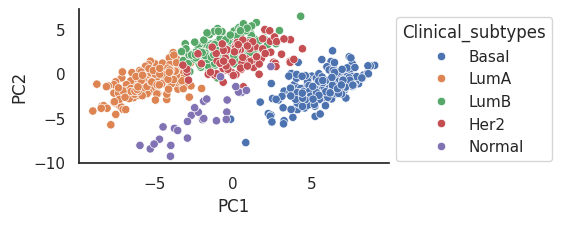

In [20]:
p = sns.scatterplot(data_reduce, x=0, y=1, hue="Clinical_subtypes")

p.set_xlabel('PC1')
p.set_ylabel('PC2')
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

print("Yes, I do think so because the points appear to already form individual clusters,")
print("the points are not scattered arround randomly.")

### Apply the K-means algorithm to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

In [21]:
subset_KM = data_reduce.iloc[:, 0:25]
subset_KM

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5.737783,-2.114879,0.957042,3.111174,-0.007781,0.452228,-1.311013,1.900442,-1.276902,-0.779902,...,2.266691,-1.546205,0.229424,-0.631348,-0.571140,0.983780,0.026614,0.991039,0.421865,-1.206125
1,5.586829,-2.510840,-0.939535,0.370624,1.981533,-0.214957,-0.126106,-0.873382,-0.196873,0.130535,...,-0.707139,0.319784,-0.197436,0.298935,-0.043598,-0.016837,-0.199250,-0.493350,-0.413982,0.073247
2,8.296841,-0.329168,-2.064708,-1.212346,1.594945,-0.822196,0.154304,0.278601,-0.061110,0.858779,...,1.253571,-0.191447,0.132325,-0.082586,0.040340,-0.328934,0.326424,-0.244879,-0.022670,-0.238045
3,7.442864,0.080622,-0.774431,1.823684,1.120201,-0.962194,-0.925668,0.808279,-0.167956,-0.139941,...,0.430989,-0.396927,-0.338059,0.006650,-0.213155,0.244911,-0.374905,-0.434506,-0.014839,-0.036035
4,3.744414,-2.141032,-2.330520,-6.463385,-1.588350,-0.724702,-1.598153,1.948666,-0.319360,-0.699529,...,-0.636510,-0.894915,0.248127,-2.290100,1.215417,0.586313,0.876758,0.094520,-0.350452,-0.465641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-3.750801,-6.180464,1.467570,1.738953,-0.540610,1.761738,-0.335785,-0.266745,0.398395,1.114921,...,-0.040395,-1.007701,0.395565,0.200190,0.432334,0.183184,0.093667,0.693532,0.188052,0.180365
641,0.841944,-1.906984,1.377986,2.439003,-0.585188,0.045066,-0.447785,0.354056,0.356766,1.329149,...,0.084226,-0.669390,0.103650,0.127336,0.449140,0.557139,0.230404,-0.005950,-0.253125,-0.221140
642,-3.547326,-6.415007,2.016808,1.266327,-0.257006,1.524629,-0.300092,0.587767,0.688721,-0.242530,...,-0.028196,0.140954,0.297562,0.931112,0.584792,0.563986,-0.248733,0.145225,0.322369,0.320074
643,-2.463402,-3.855768,4.488324,0.127806,-0.833840,-1.151209,-1.058032,1.139078,0.726382,0.659551,...,0.818390,0.520957,-0.132080,-0.052258,0.275043,0.213921,0.571939,-0.024716,0.698069,0.091953


In [22]:
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")


In [23]:
kmeans_subset = kmean_algo.fit(subset_KM)

In [24]:
#data_reduce

kmeans_subset.cluster_centers_
cent_by_axes = kmeans_subset.cluster_centers_.T
cent_by_axes


array([[ 3.94007239e+00, -9.16268033e-01,  6.54129200e+00,
        -5.11764950e+00,  5.88378152e-01],
       [-2.96113158e+00,  2.68201478e+00, -7.55617630e-01,
        -1.58530019e+00,  2.00694219e+00],
       [ 8.87329110e-02, -9.46862962e-01, -8.38902433e-01,
        -3.03906372e-01,  3.37320268e+00],
       [ 2.66219423e-01,  3.60982544e-01, -3.52030873e-01,
        -6.07523823e-02, -3.75166980e-01],
       [-2.30036033e-01, -1.42252780e-01,  3.00093385e-01,
         2.19324185e-02,  7.25823444e-02],
       [-1.63727028e-01, -1.61832327e-01,  7.87686827e-02,
         3.28410747e-02,  2.96384158e-01],
       [ 9.08003474e-02, -1.93583065e-01,  5.42531307e-02,
         1.21856565e-01, -4.25648959e-02],
       [-3.07264191e-01, -5.64192912e-02,  1.30245443e-01,
         7.66049326e-02,  7.95225373e-02],
       [ 1.16232535e-01,  1.43763408e-01, -1.84396902e-01,
        -1.73457704e-02, -1.18963515e-01],
       [-1.77653959e-01, -5.37688258e-02, -9.01313832e-03,
         1.01033419e-01

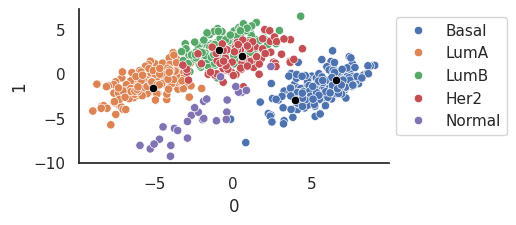

In [25]:
p = sns.scatterplot(data_reduce, x=0, y=1, hue="Clinical_subtypes")

### Visualize the centroide on the plot
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color="black")

sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [26]:
data_reduce

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,Clinical_subtypes
0,5.737783,-2.114879,0.957042,3.111174,-0.007781,0.452228,-1.311013,1.900442,-1.276902,-0.779902,...,-1.546205,0.229424,-0.631348,-0.571140,0.983780,0.026614,0.991039,0.421865,-1.206125,Basal
1,5.586829,-2.510840,-0.939535,0.370624,1.981533,-0.214957,-0.126106,-0.873382,-0.196873,0.130535,...,0.319784,-0.197436,0.298935,-0.043598,-0.016837,-0.199250,-0.493350,-0.413982,0.073247,Basal
2,8.296841,-0.329168,-2.064708,-1.212346,1.594945,-0.822196,0.154304,0.278601,-0.061110,0.858779,...,-0.191447,0.132325,-0.082586,0.040340,-0.328934,0.326424,-0.244879,-0.022670,-0.238045,Basal
3,7.442864,0.080622,-0.774431,1.823684,1.120201,-0.962194,-0.925668,0.808279,-0.167956,-0.139941,...,-0.396927,-0.338059,0.006650,-0.213155,0.244911,-0.374905,-0.434506,-0.014839,-0.036035,Basal
4,3.744414,-2.141032,-2.330520,-6.463385,-1.588350,-0.724702,-1.598153,1.948666,-0.319360,-0.699529,...,-0.894915,0.248127,-2.290100,1.215417,0.586313,0.876758,0.094520,-0.350452,-0.465641,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,-3.750801,-6.180464,1.467570,1.738953,-0.540610,1.761738,-0.335785,-0.266745,0.398395,1.114921,...,-1.007701,0.395565,0.200190,0.432334,0.183184,0.093667,0.693532,0.188052,0.180365,Normal
641,0.841944,-1.906984,1.377986,2.439003,-0.585188,0.045066,-0.447785,0.354056,0.356766,1.329149,...,-0.669390,0.103650,0.127336,0.449140,0.557139,0.230404,-0.005950,-0.253125,-0.221140,Normal
642,-3.547326,-6.415007,2.016808,1.266327,-0.257006,1.524629,-0.300092,0.587767,0.688721,-0.242530,...,0.140954,0.297562,0.931112,0.584792,0.563986,-0.248733,0.145225,0.322369,0.320074,Normal
643,-2.463402,-3.855768,4.488324,0.127806,-0.833840,-1.151209,-1.058032,1.139078,0.726382,0.659551,...,0.520957,-0.132080,-0.052258,0.275043,0.213921,0.571939,-0.024716,0.698069,0.091953,Normal


In [27]:
kmeans_subset.labels_

subset_KM.loc[:, "Clinical_subtypes"] = data.Clinical_subtypes
subset_KM.loc[:, "kmeans_labels"] = kmeans_subset.labels_

subset_KM.head(40)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,Clinical_subtypes,kmeans_labels
0,5.737783,-2.114879,0.957042,3.111174,-0.007781,0.452228,-1.311013,1.900442,-1.276902,-0.779902,...,0.229424,-0.631348,-0.571140,0.983780,0.026614,0.991039,0.421865,-1.206125,Basal,0
1,5.586829,-2.510840,-0.939535,0.370624,1.981533,-0.214957,-0.126106,-0.873382,-0.196873,0.130535,...,-0.197436,0.298935,-0.043598,-0.016837,-0.199250,-0.493350,-0.413982,0.073247,Basal,2
2,8.296841,-0.329168,-2.064708,-1.212346,1.594945,-0.822196,0.154304,0.278601,-0.061110,0.858779,...,0.132325,-0.082586,0.040340,-0.328934,0.326424,-0.244879,-0.022670,-0.238045,Basal,2
3,7.442864,0.080622,-0.774431,1.823684,1.120201,-0.962194,-0.925668,0.808279,-0.167956,-0.139941,...,-0.338059,0.006650,-0.213155,0.244911,-0.374905,-0.434506,-0.014839,-0.036035,Basal,2
4,3.744414,-2.141032,-2.330520,-6.463385,-1.588350,-0.724702,-1.598153,1.948666,-0.319360,-0.699529,...,0.248127,-2.290100,1.215417,0.586313,0.876758,0.094520,-0.350452,-0.465641,Basal,2
5,5.967373,-2.731577,0.378881,3.125220,1.177375,-0.740864,-1.467484,-1.522091,-0.501662,0.529066,...,-0.166599,-0.155598,-0.493498,-0.589972,0.012534,1.116714,0.273948,-1.705884,Basal,0
6,7.097900,-1.872338,0.110509,2.483268,-0.457430,-0.275138,0.674313,-0.692428,1.134225,-0.344806,...,-0.824023,0.646606,-1.147858,-0.157338,0.422080,0.705246,-0.067155,0.287005,Basal,2
7,5.730326,-1.653055,-0.600768,-0.243565,0.593177,-0.398865,1.098045,-0.201597,0.283587,-1.021970,...,-0.585952,0.570920,0.742268,0.060900,0.031614,-0.031816,-0.131148,0.041600,Basal,2
8,2.239797,-4.516359,1.129646,0.185753,-0.247291,-1.735702,0.048040,-0.533058,-0.401769,-1.052409,...,0.038602,0.683952,-0.254893,-0.159474,-0.138276,0.221030,-0.100736,-0.011345,Basal,0
9,3.545838,-2.172439,0.937333,-0.677996,0.343689,-0.557893,-0.028563,-0.253263,0.632478,-0.438278,...,0.372122,0.707755,0.561603,-0.494978,0.092969,0.209873,-0.114827,0.794707,Basal,0


### What value of k did you use and why? [2 pt]

In [28]:
print("I used 5 clusters since there are 5 different clincal subtypes which seem to cluster together")
print("hence it is biologically relevant and approrptae to use n=k=5 clusters.")

I used 5 clusters since there are 5 different clincal subtypes which seem to cluster together
hence it is biologically relevant and approrptae to use n=k=5 clusters.


In [29]:
kmeans_subset.inertia_

12415.151556046205

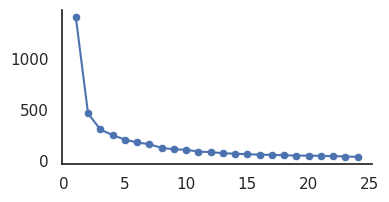

In [30]:
inertia_list = []

X = data.iloc[:, [0, 1]]

### Create for loop for K from 1 to 10
for k in range(1, 25) :
    kmean = sklearn.cluster.KMeans(n_clusters=k, n_init="auto")
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
sns.lineplot(x=np.arange(1, 25), y=inertia_list)
sns.scatterplot(x=np.arange(1, 25), y=inertia_list)
sns.despine()

### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**

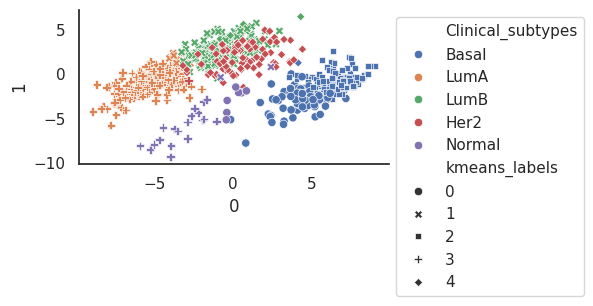

In [31]:
p = sns.scatterplot(subset_KM, x=0, y=1, hue="Clinical_subtypes", style="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()